# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import pandas as pd
import numpy as np
import requests
import time
import pprint
from scipy.stats import linregress

# Import the OpenWeatherMap API key and output path
from api_keys import weather_api_key
# from api_keys import output_path

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
from api_keys import output_path

In [3]:
BASE_URL = 'https://api.openweathermap.org/data/2.5/weather?appid=' + weather_api_key + '&units=imperial'
NUM_POINTS = 1500

HTTP_STATUS_OK = 200
HTTP_STATUS_NOT_FOUND = 404

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the cities' names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=NUM_POINTS)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=NUM_POINTS)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


In [5]:
# Make a single API call to see what the data returned looks like

sample_weather = 'https://api.openweathermap.org/data/2.5/weather?lat=31.84353411571213&lon=71.30318609462759&appid=' + weather_api_key

sample_weather_result = requests.get(sample_weather)
pprint.pp(sample_weather_result.json())


{'coord': {'lon': 71.3032, 'lat': 31.8435},
 'weather': [{'id': 803,
              'main': 'Clouds',
              'description': 'broken clouds',
              'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 304.38,
          'feels_like': 309.3,
          'temp_min': 304.38,
          'temp_max': 304.38,
          'pressure': 1004,
          'humidity': 63,
          'sea_level': 1004,
          'grnd_level': 984},
 'visibility': 10000,
 'wind': {'speed': 2.99, 'deg': 102, 'gust': 5.07},
 'clouds': {'all': 81},
 'dt': 1690044026,
 'sys': {'country': 'PK', 'sunrise': 1689985403, 'sunset': 1690035520},
 'timezone': 18000,
 'id': 1179496,
 'name': 'Dullewala',
 'cod': 200}


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = BASE_URL + '&q=' + city.replace(' ', '+')
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    city_response = requests.get(city_url)
    status_code = city_response.status_code
    
    # Run an API request for each of the cities
    if status_code == HTTP_STATUS_OK:
        # Parse the JSON and retrieve data
        city_weather = city_response.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all'] # this is the percent coverage expressed as an integer
        city_wind_spd = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind_spd,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    elif status_code == HTTP_STATUS_NOT_FOUND:
        print(f"City {city} Not found. Skipping...")
    else:
        raise ValueError(f"Unknown status code {status_code} for city {city}")
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kone
Processing Record 2 of Set 1 | tandalti
Processing Record 3 of Set 1 | sturgis
Processing Record 4 of Set 1 | kerikeri
Processing Record 5 of Set 1 | fonadhoo
City fonadhoo Not found. Skipping...
Processing Record 6 of Set 1 | fergus falls
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | uliastay
Processing Record 9 of Set 1 | iskateley
Processing Record 10 of Set 1 | assai
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | coquimbo
Processing Record 13 of Set 1 | cabo san lucas
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | kupang
Processing Record 16 of Set 1 | knyaze-volkonskoye
Processing Record 17 of Set 1 | hawaiian paradise park
Processing Record 18 of Set 1 | wanning
Processing Record 19 of Set 1 | magadan
Processing Record 20 of Set 1 | tamanrasset
Processing Record 21 of Set 1 | anadyr
Processing Record 22 

Processing Record 35 of Set 4 | shizunai-furukawacho
Processing Record 36 of Set 4 | dingzhou
Processing Record 37 of Set 4 | maqat
Processing Record 38 of Set 4 | kharp
Processing Record 39 of Set 4 | hermanus
Processing Record 40 of Set 4 | nishinoomote
Processing Record 41 of Set 4 | yemetsk
Processing Record 42 of Set 4 | long beach
Processing Record 43 of Set 4 | paita
Processing Record 44 of Set 4 | xacmaz
Processing Record 45 of Set 4 | iola
Processing Record 46 of Set 4 | lianzhou
Processing Record 47 of Set 4 | khandyga
Processing Record 48 of Set 4 | kirakira
Processing Record 49 of Set 4 | kapa'a
Processing Record 0 of Set 5 | rijau
Processing Record 1 of Set 5 | inyonga
Processing Record 2 of Set 5 | homer
Processing Record 3 of Set 5 | puerto ayora
Processing Record 4 of Set 5 | fray luis beltran
Processing Record 5 of Set 5 | miami
Processing Record 6 of Set 5 | karak city
Processing Record 7 of Set 5 | prince rupert
Processing Record 8 of Set 5 | kalmunai
Processing Reco

Processing Record 20 of Set 8 | sao vicente
Processing Record 21 of Set 8 | sebis
Processing Record 22 of Set 8 | kolosovka
Processing Record 23 of Set 8 | batticaloa
Processing Record 24 of Set 8 | naze
Processing Record 25 of Set 8 | lower hutt
Processing Record 26 of Set 8 | senillosa
Processing Record 27 of Set 8 | tazovsky
Processing Record 28 of Set 8 | hasaki
Processing Record 29 of Set 8 | seogwipo
City seogwipo Not found. Skipping...
Processing Record 30 of Set 8 | jilma
Processing Record 31 of Set 8 | ghat
Processing Record 32 of Set 8 | puerto baquerizo moreno
Processing Record 33 of Set 8 | glace bay
Processing Record 34 of Set 8 | maindargi
Processing Record 35 of Set 8 | severo-yeniseyskiy
Processing Record 36 of Set 8 | hinton
Processing Record 37 of Set 8 | makarska
Processing Record 38 of Set 8 | kurchatov
Processing Record 39 of Set 8 | karratha
Processing Record 40 of Set 8 | tatishchevo
Processing Record 41 of Set 8 | hilo
Processing Record 42 of Set 8 | sitka
Proce

Processing Record 8 of Set 12 | mount isa
Processing Record 9 of Set 12 | klaksvik
Processing Record 10 of Set 12 | madang
Processing Record 11 of Set 12 | amherstburg
Processing Record 12 of Set 12 | manay
Processing Record 13 of Set 12 | jeddah
Processing Record 14 of Set 12 | sao miguel do araguaia
Processing Record 15 of Set 12 | sandnessjoen
Processing Record 16 of Set 12 | minas de marcona
Processing Record 17 of Set 12 | nova xavantina
Processing Record 18 of Set 12 | worthington
Processing Record 19 of Set 12 | zelenoborskiy
Processing Record 20 of Set 12 | la ronge
Processing Record 21 of Set 12 | ascoli piceno
Processing Record 22 of Set 12 | haiku-pauwela
Processing Record 23 of Set 12 | mukalla
Processing Record 24 of Set 12 | regina
Processing Record 25 of Set 12 | banda aceh
Processing Record 26 of Set 12 | macusani
Processing Record 27 of Set 12 | darwin
Processing Record 28 of Set 12 | lincheng
Processing Record 29 of Set 12 | padam
City padam Not found. Skipping...
Pro

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_weather_df = pd.DataFrame(city_data)

# Show Record Count
city_weather_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [8]:
# Display sample data
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kone,-21.0595,164.8658,63.93,72,49,3.85,NC,1690044029
1,tandalti,13.0167,31.8667,93.16,35,88,7.02,SD,1690044029
2,sturgis,41.7992,-85.4192,81.07,43,0,3.44,US,1690043888
3,kerikeri,-35.2268,173.9474,50.92,93,100,1.01,NZ,1690044030
4,fergus falls,46.2830,-96.0776,79.18,64,0,6.91,US,1690043949


In [9]:
# Export the City_Data into a csv
city_weather_df.to_csv(f"{output_path}cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_weather_df = pd.read_csv(f"{output_path}cities.csv", index_col="City_ID")

# Display sample data
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kone,-21.0595,164.8658,63.93,72,49,3.85,NC,1690044029
1,tandalti,13.0167,31.8667,93.16,35,88,7.02,SD,1690044029
2,sturgis,41.7992,-85.4192,81.07,43,0,3.44,US,1690043888
3,kerikeri,-35.2268,173.9474,50.92,93,100,1.01,NZ,1690044030
4,fergus falls,46.2830,-96.0776,79.18,64,0,6.91,US,1690043949


In [11]:
# Get the date the data was retrieved
timestamp = city_weather_df['Date'].iloc[0]
dt = time.localtime(timestamp)
mmddyy = f"{dt[1]}-{dt[2]}-{dt[0]}"

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

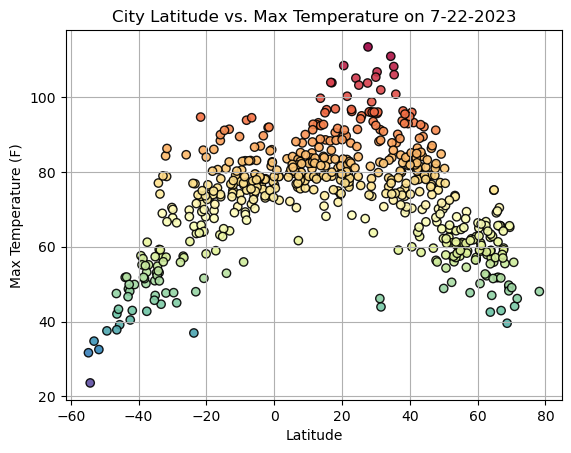

In [12]:
# Build scatter plot for latitude vs. temperature
x = city_weather_df['Lat']
y = city_weather_df['Max Temp']
colors = city_weather_df['Max Temp']

# Incorporate the other graph properties
fig, ax = plt.subplots()
ax.scatter(x, y, c=colors, cmap='Spectral_r', alpha=0.9, edgecolors='black')
ax.set(xlabel='Latitude', ylabel='Max Temperature (F)',
      title=f'City Latitude vs. Max Temperature on {mmddyy}')
ax.grid()

# Save the figure
plt.savefig(f"{output_path}Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

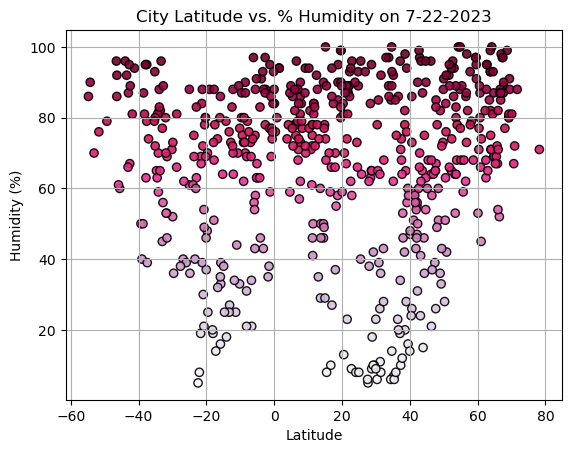

In [13]:
# Build the scatter plots for latitude vs. humidity
x = city_weather_df['Lat']
y = city_weather_df['Humidity']
colors = city_weather_df['Humidity'] 

# Incorporate the other graph properties
fig, ax = plt.subplots()
ax.scatter(x, y, c=colors, cmap='PuRd', alpha=0.9, edgecolors='black')
ax.set(xlabel='Latitude', ylabel='Humidity (%)',
      title=f'City Latitude vs. % Humidity on {mmddyy}')
ax.grid()
# Save the figure
plt.savefig(f"{output_path}Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

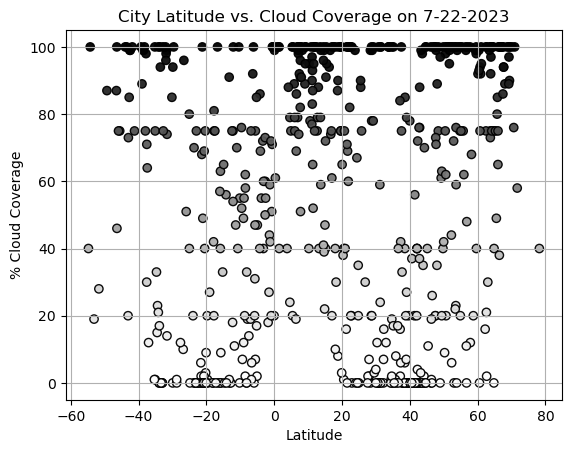

In [14]:
# Build the scatter plots for latitude vs. cloudiness
x = city_weather_df['Lat']
y = city_weather_df['Cloudiness']
colors = city_weather_df['Cloudiness'] 

# Incorporate the other graph properties
fig, ax = plt.subplots()
ax.scatter(x, y, c=colors, cmap='Greys', alpha=.95, edgecolors='black')
ax.set(xlabel='Latitude', ylabel='% Cloud Coverage',
      title=f'City Latitude vs. Cloud Coverage on {mmddyy}')
ax.grid()

# Save the figure
plt.savefig(f"{output_path}Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

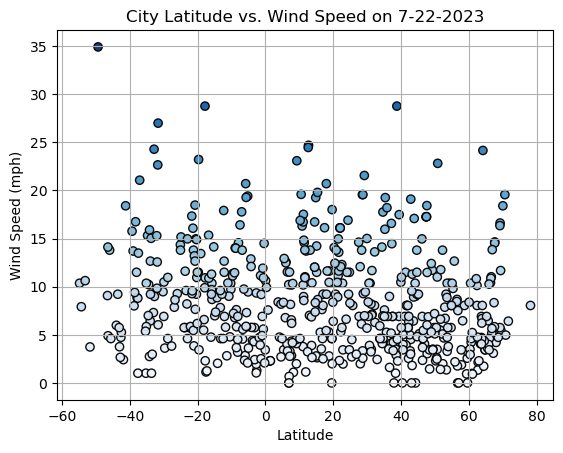

In [15]:
# Build the scatter plots for latitude vs. wind speed -- should be wind speed vs latituxxde
x = city_weather_df['Lat']
y = city_weather_df['Wind Speed']
colors = city_weather_df['Wind Speed']

# Incorporate the other graph properties
fig, ax = plt.subplots()
ax.scatter(x, y, c=colors, cmap='Blues', alpha=.95, edgecolors='black')
ax.set(xlabel='Latitude', ylabel='Wind Speed (mph)',
      title=f'City Latitude vs. Wind Speed on {mmddyy}')
ax.grid()

# Save the figure
plt.savefig(f"{output_path}Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_weather_df[city_weather_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tandalti,13.0167,31.8667,93.16,35,88,7.02,SD,1690044029
2,sturgis,41.7992,-85.4192,81.07,43,0,3.44,US,1690043888
4,fergus falls,46.2830,-96.0776,79.18,64,0,6.91,US,1690043949
5,iqaluit,63.7506,-68.5145,42.53,93,75,6.91,CA,1690044030
6,uliastay,47.7417,96.8444,56.37,67,99,3.04,MN,1690044030


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_weather_df[city_weather_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kone,-21.0595,164.8658,63.93,72,49,3.85,NC,1690044029
3,kerikeri,-35.2268,173.9474,50.92,93,100,1.01,NZ,1690044030
8,assai,-23.3733,-50.8414,76.86,40,0,9.60,BR,1690044031
9,port-aux-francais,-49.3500,70.2167,37.51,79,87,34.92,TF,1690044031
10,coquimbo,-29.9533,-71.3436,67.73,52,0,6.91,CL,1690043904


In [18]:
# Define a function to create Linear Regression plots
# Possible values for y_col_name: temperature, humidity, clouds, wind
# Possible values for hemisphere: n, s

def regression_plot(y_col_name, hemisphere):
    # set up graph
    fig, ax = plt.subplots()
    
    # select dataframe to use based on hemisphere passed to the function
    if hemisphere.lower() == 'n':
        df = northern_hemi_df
        plt.xlim(-5, 85)
    elif hemisphere.lower() == 's':
        df = southern_hemi_df
        plt.xlim(-60, 0)
    else:
        raise ValueError(f"Unknown value input for hemisphere: {hemisphere}. Please choose 'n' or 's'.")
      
    # get the date the data was retrieved
    timestamp = df['Date'].iloc[0]
    dt = time.localtime(timestamp)
    mmddyy = f"{dt[1]}-{dt[2]}-{dt[0]}"
            
    # select y axis, colors, labels, line position, based on parameter chosen
    if y_col_name == 'temperature':
        y_data = df['Max Temp']
        colorscheme = 'Spectral_r'
        ylabel_name = 'Max Temperature (F)'
        plt.ylim = ((df['Max Temp'].min() - 5), (df['Max Temp'].max() + 5))
        
    elif y_col_name == 'humidity':
        y_data = df['Humidity']
        colorscheme = 'PuRd'
        ylabel_name = 'Humidity (%)'
        plt.ylim = (0, 100)
        
    elif y_col_name == 'clouds':
        y_data = df['Cloudiness']
        colorscheme = 'Greys'
        ylabel_name = 'Cloud Coverage (%)'
        plt.ylim = (0, 100)
        
    elif y_col_name == 'wind':
        y_data = df['Wind Speed']
        colorscheme = 'Blues'
        ylabel_name = 'Wind Speed (mph)'
        plt.ylim = (0, (df['Wind Speed'].max() + 5))
        
    else:
        raise ValueError
        (f"Unknown value input for y_col_name: {y_col_name}. Please choose one: 'temperature', 'humidity', 'clouds', or 'wind'.")
    
    # x axis data is always latitude
    x_data = df['Lat']
    xlabel = 'Latitude'
    
    # get ready... and, graph!
    ax.scatter(x_data, y_data, c=y_data, cmap=colorscheme, alpha=.9, edgecolors='black')
    ax.set(xlabel='Latitude', ylabel=ylabel_name, 
           title=f"City Latitude vs. {ylabel_name} on {mmddyy}")
    ax.grid()
    
    # do some statistics stuff, draw regression line, print line equation & r-value
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
    reg_line_plot_yvals = x * slope + intercept
    reg_line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
    
    ax.plot(x,reg_line_plot_yvals,color="lightcoral")
    box_props = dict(boxstyle='round', facecolor='lightcoral', alpha=0.3)
    ax.text(0.05, 0.95, reg_line_eq, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=box_props)    

    print(f"The r-value is: {rvalue}")
    print(f"The regression line equation is: {reg_line_eq}")

    # save the scatter plot
    save_filename = f"{hemisphere}_{y_col_name}_{mmddyy}.png"
    plt.savefig(f"{output_path}{save_filename}")
    
    # draw the scatter plot
    plt.show()

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.626907081757879
The regression line equation is: y = -0.45x + 92.13


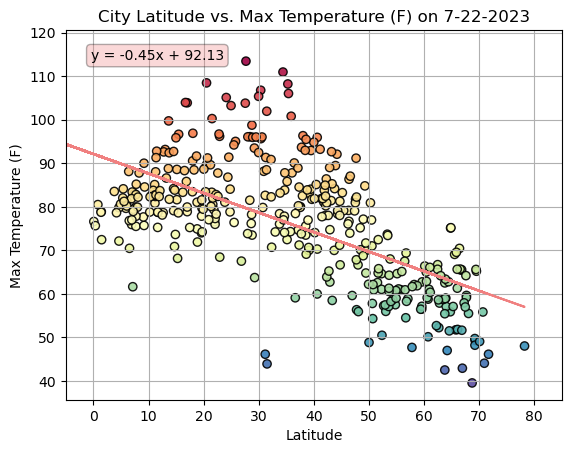

In [19]:
# Linear regression on Northern Hemisphere
regression_plot('temperature','n')

The r-value is: 0.7824452148690667
The regression line equation is: y = 0.82x + 85.03


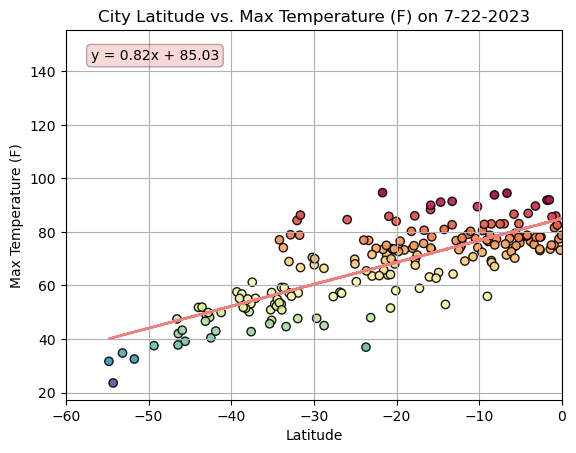

In [20]:
# Linear regression on Southern Hemisphere
regression_plot('temperature','s')

**Discussion about the linear relationship:** As expected, we see a strong relationship between temperature and latitude in both hemispheres: it gets hotter as you get closer to the equator. Since it is winter in the southern hemisphere and summer in the northern hemisphere, the low temperatures are somewhat lower in the south than the north.  It's interesting to see that the relationship is stronger in the southern hemisphere, although there appear to be quite a few more observations in the northern hemisphere. In the northern hemisphere, in the region from 20 to 40 degrees of latitude, there are quite a few points that are further from the line, especially on the hotter side. It would be instructive to look at historical data and see if this is a common occurrence or if it's part of the unusual weather patterns we are seeing recently due to climate change.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.07777055573722848
The regression line equation is: y = 0.1x + 64.43


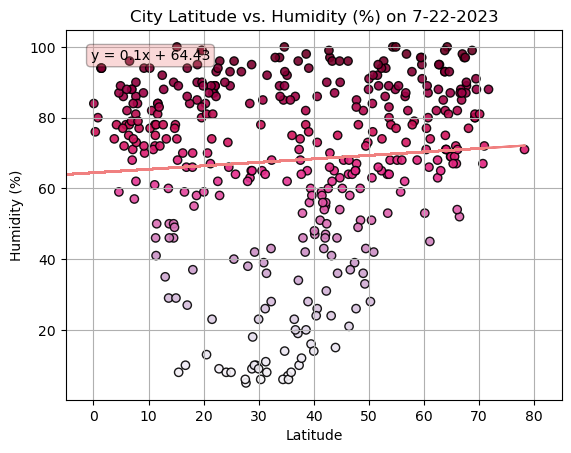

In [21]:
# Northern Hemisphere
regression_plot('humidity','n')

The r-value is: -0.12355930244536205
The regression line equation is: y = -0.2x + 61.16


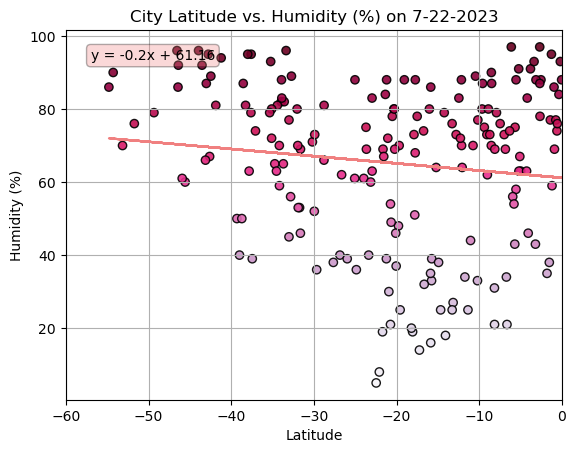

In [22]:
# Southern Hemisphere
regression_plot('humidity','s')

**Discussion about the linear relationship:** There does not appear to be much of a relationship at all between latitude and humidity. The very slight positive slope of the line in the northern hemisphere could possibly be attributed to the fact that it is summer and that in some locations when it is hotter it also tends to be more humid.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.03037601004365665
The regression line equation is: y = -0.06x + 61.49


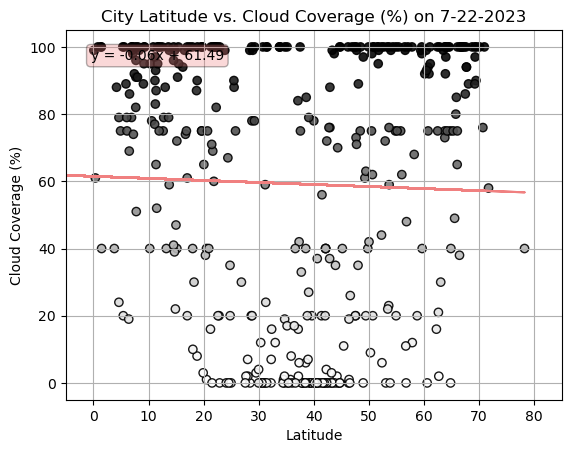

In [23]:
# Northern Hemisphere
regression_plot('clouds', 'n')

The r-value is: -0.19570976070105198
The regression line equation is: y = -0.52x + 34.52


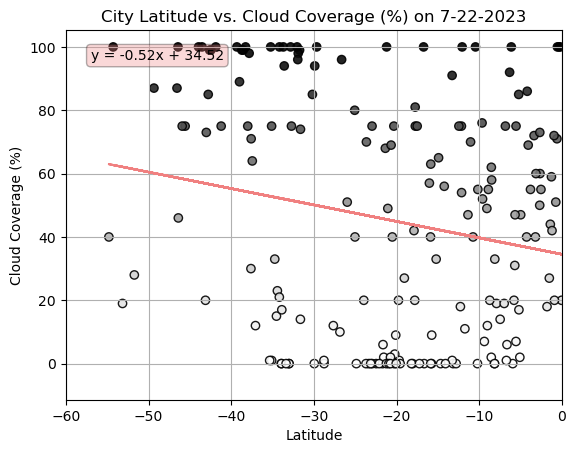

In [24]:
# Southern Hemisphere
regression_plot('clouds', 's')

**Discussion about the linear relationship:** Similarly there is not much of a relationship between latitude and cloud coverage. We do see clusters of points together in the northern hemisphere: lots of clouds in some areas near the equator and the more northerly regions, and then some clear areas in the middle latitudes. This makes sense given how clouds behave.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.13632860180520556
The regression line equation is: y = -0.04x + 9.17


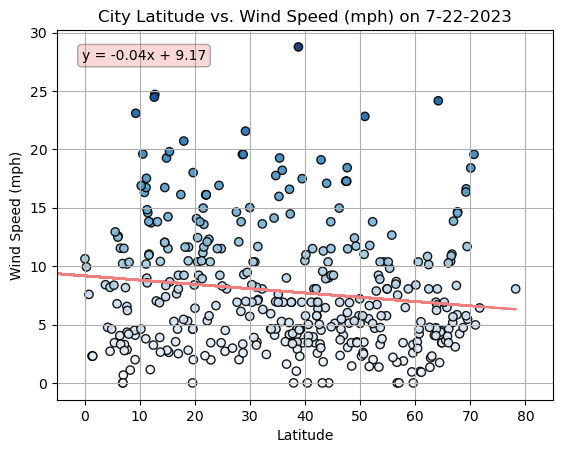

In [25]:
# Northern Hemisphere
regression_plot('wind', 'n')

The r-value is: -0.14516179417312114
The regression line equation is: y = -0.06x + 8.1


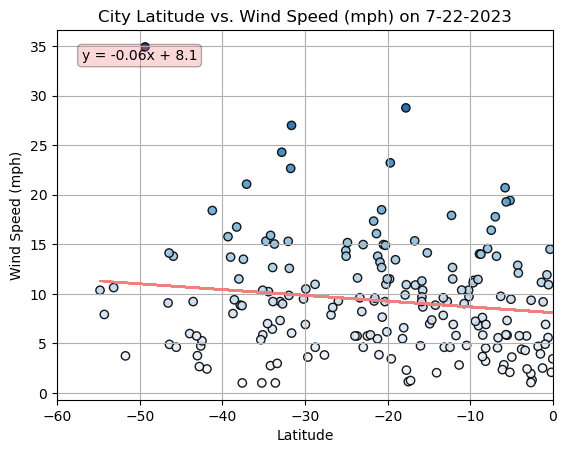

In [26]:
# Southern Hemisphere
regression_plot('wind','s')

**Discussion about the linear relationship:** Again, the correlation between latitude and wind speed is so weak as to be negligible. The only strong correlation we have found with latitude is the temperature.